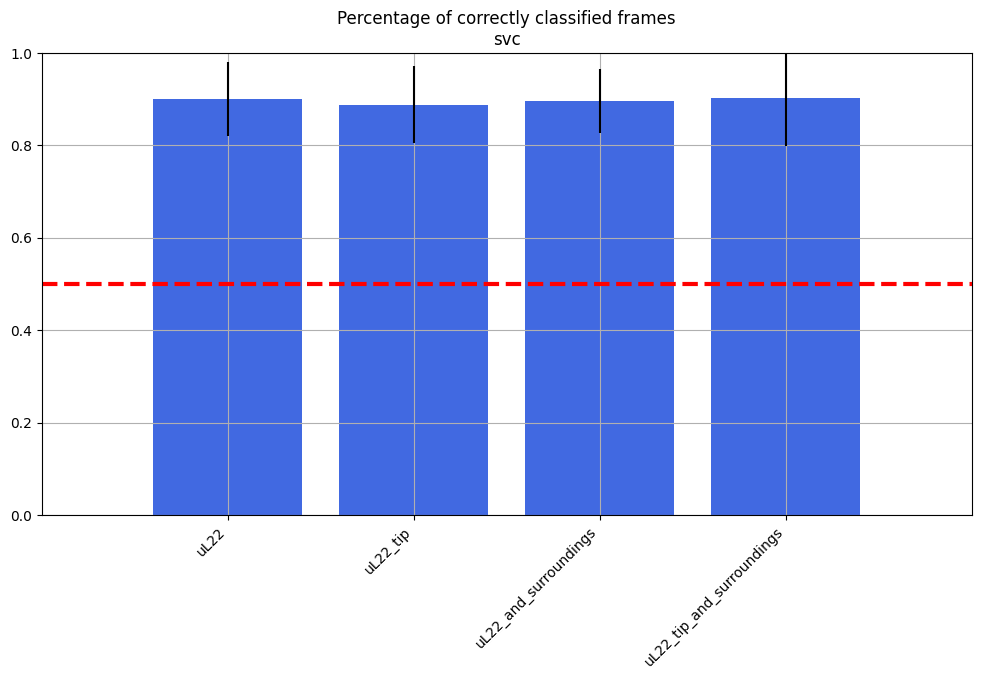

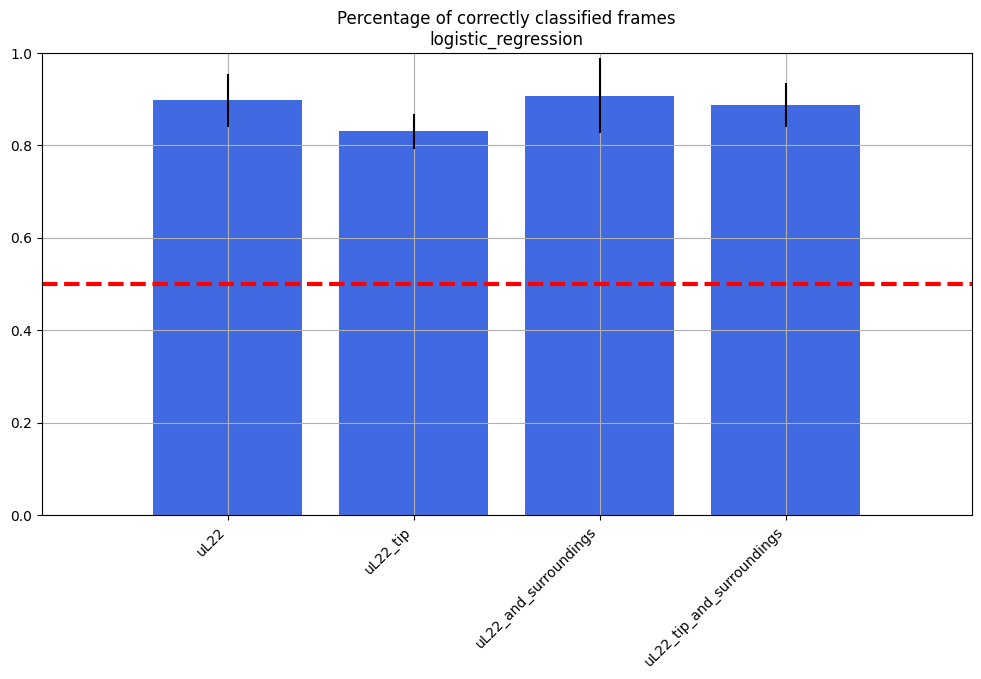

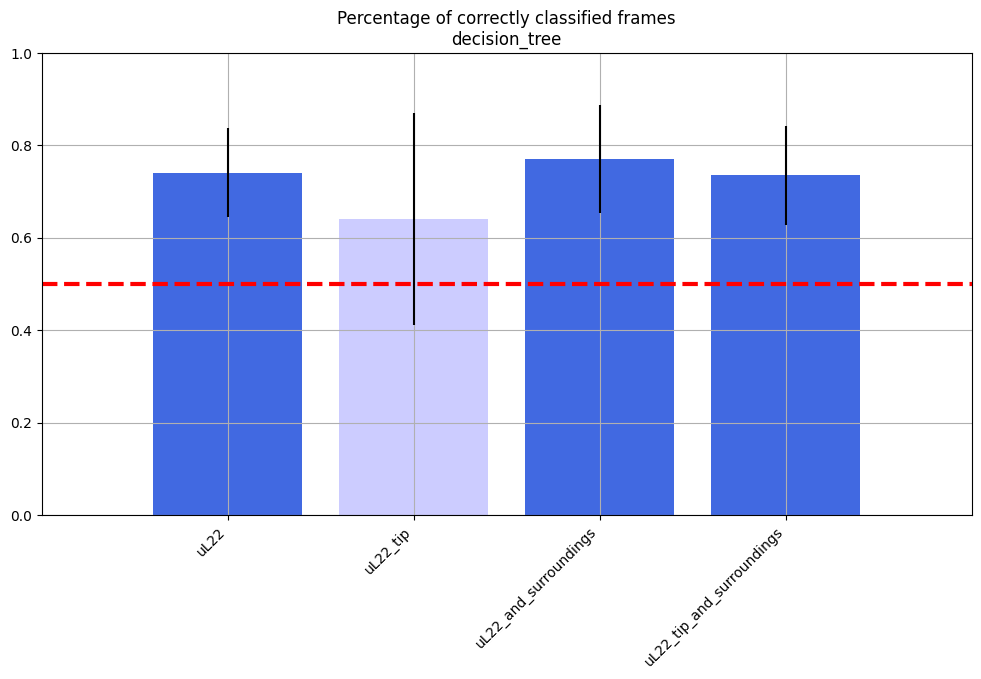

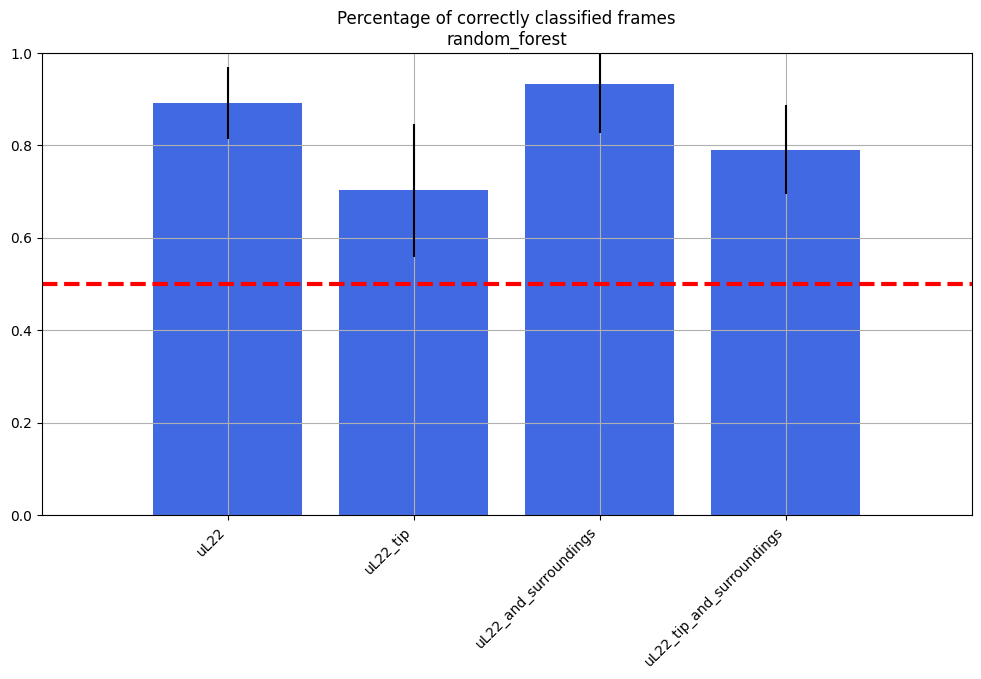

In [1]:
import numpy as np
import plotting_functions as pf
import shared_data as sd
import utility_functions as uf


y_test = sd.y
for model in sd.MODEL_KWARGS_DICT:

    percentage_correct_mean_array = np.zeros(len(sd.SELECTION_DICT))
    percentage_correct_std_array = np.zeros(len(sd.SELECTION_DICT))
    for i, selection_name in enumerate(sd.SELECTION_DICT):

        y_pred = np.load(
            (f"{sd.RESULTS_DIR}/"
                f"y_pred_{selection_name}_{model}.npy")
        )
        
        # count number of times prediction matches reality
        n_correct = np.sum(y_pred == y_test, axis=1)
        percentage_correct = n_correct / y_pred.shape[1]
        
        percentage_correct_mean_array[i] = np.mean(percentage_correct)
        percentage_correct_std_array[i] = np.std(percentage_correct, 
                                                ddof=1)

    pf.correct_classification_overview(percentage_correct_mean_array, 
                                        percentage_correct_std_array, 
                                        model, list(sd.SELECTION_DICT))
